In [4]:
import pandas as pd 
import numpy as np

In [5]:
autores = pd.read_excel('AuthorsMetrics2012-2022.xlsx', header = 0)
pub = pd.read_csv('publications.csv', header = 0) 

In [6]:
pub.drop(['Unnamed: 0','Field-Weighted View Impact','Views','Citations','Field-Citation Average','Outputs in Top Citation Percentiles, per percentile','Field-Weighted Outputs in Top Citation Percentiles, per percentile','Topic Cluster Prominence Percentile','Topic Prominence Percentile'], inplace = True, axis = 1)

In [7]:
pub.head() 

,Scopus Author Ids,Year,ISSN,Source type,SNIP (publication year),SNIP percentile (publication year) *,CiteScore (publication year),CiteScore percentile (publication year) *,SJR (publication year),SJR percentile (publication year) *,Field-Weighted Citation Impact,Scopus Author ID First Author,Country/Region
0,56830597200,2017,ISSN-17452473,Journal,5.63,1.0,34.3,2.0,9.791,1.0,8.02,5.683060e+10,Mexico| South Africa| Canada
1,55659257900,2017,ISSN-17452473,Journal,5.63,1.0,34.3,2.0,9.791,1.0,8.02,5.683060e+10,Mexico| South Africa| Canada
2,7102071729,2017,ISSN-17452473,Journal,5.63,1.0,34.3,2.0,9.791,1.0,8.02,5.683060e+10,Mexico| South Africa| Canada
3,25923538600,2017,ISSN-17452473,Journal,5.63,1.0,34.3,2.0,9.791,1.0,8.02,5.683060e+10,Mexico| South Africa| Canada
4,55350783400,2017,ISSN-17452473,Journal,5.63,1.0,34.3,2.0,9.791,1.0,8.02,5.683060e+10,Mexico| South Africa| Canada


In [8]:
pub.drop(['ISSN','Source type','Country/Region','Year'], inplace = True, axis = 1) 

In [9]:
autores.head()

,Scopus author ID,Scholarly Output,Most recent publication,Citations,Citations per Publication,Field-Weighted Citation Impact,h-index,Output in Top 10% Citation Percentiles (field-weighted),Oldest publication (since 1996)
0,6503851729,8,2022,53,6.6,0.63,5,0,2004
1,6503865347,2,2019,37,18.5,0.98,6,0,2005
2,6503873393,1,2013,23,23.0,8.42,15,2,2011
3,6503876779,1,2019,1,1.0,0.87,7,0,2019
4,6503884764,3,2016,13,4.3,0.14,3,0,1999


In [10]:
autores.drop(['Citations','Citations per Publication','Output in Top 10% Citation Percentiles (field-weighted)','Field-Weighted Citation Impact','Scholarly Output'], inplace = True, axis = 1)

In [11]:
autores = autores[['Scopus author ID','Oldest publication (since 1996)','Most recent publication','h-index']]
autores.rename(columns = {'Scopus author ID':'Scopus Author Ids'}, inplace = True)

In [13]:
pub['Scopus Author Ids'] = pub['Scopus Author Ids'].astype('int64')

Juntamos los 2 datasets

In [14]:
df = pd.merge(autores, pub, on='Scopus Author Ids')  

In [15]:
df.shape

(31803, 12)

Como los autores aparecen más de 1 vez, borramos los duplicados

In [17]:
frecuencia = df['Scopus Author Ids'].value_counts() 
df['Frecuencia'] = df['Scopus Author Ids'].map(frecuencia)

In [19]:
df2 = df.drop_duplicates()

In [21]:
df3 = df2.groupby('Scopus Author Ids').mean()


In [24]:
#crear un mapa de correlaciones de la base de datos df3
corr = df3.corr()
corr.style.background_gradient(cmap='coolwarm')

,Oldest publication (since 1996),Most recent publication,h-index,SNIP (publication year),SNIP percentile (publication year) *,CiteScore (publication year),CiteScore percentile (publication year) *,SJR (publication year),SJR percentile (publication year) *,Field-Weighted Citation Impact,Scopus Author ID First Author,Frecuencia
Oldest publication (since 1996),1.000000,-0.073915,-0.232513,0.081619,-0.086372,0.122609,-0.095964,0.118172,-0.130210,0.113716,0.197837,-0.019727
Most recent publication,-0.073915,1.000000,-0.056287,0.024103,0.022409,0.037393,-0.015853,-0.015533,0.001292,-0.033299,0.075990,-0.038343
h-index,-0.232513,-0.056287,1.000000,0.179125,-0.208844,0.207036,-0.208298,0.208874,-0.217254,0.235521,-0.091435,0.407250
SNIP (publication year),0.081619,0.024103,0.179125,1.000000,-0.757484,0.890372,-0.591395,0.856337,-0.630559,0.257381,0.052030,0.030950
SNIP percentile (publication year) *,-0.086372,0.022409,-0.208844,-0.757484,1.000000,-0.650556,0.816060,-0.631467,0.840567,-0.250569,-0.035682,-0.071929
CiteScore (publication year),0.122609,0.037393,0.207036,0.890372,-0.650556,1.000000,-0.643263,0.937991,-0.650704,0.309993,0.071359,0.046634
CiteScore percentile (publication year) *,-0.095964,-0.015853,-0.208298,-0.591395,0.816060,-0.643263,1.000000,-0.552448,0.896363,-0.239175,-0.071389,-0.083515
SJR (publication year),0.118172,-0.015533,0.208874,0.856337,-0.631467,0.937991,-0.552448,1.000000,-0.637305,0.315039,0.048376,0.029241
SJR percentile (publication year) *,-0.130210,0.001292,-0.217254,-0.630559,0.840567,-0.650704,0.896363,-0.637305,1.000000,-0.245145,-0.063831,-0.072130
Field-Weighted Citation Impact,0.113716,-0.033299,0.235521,0.257381,-0.250569,0.309993,-0.239175,0.315039,-0.245145,1.000000,-0.000336,0.064237


In [26]:
df3.describe() 

,Oldest publication (since 1996),Most recent publication,h-index,SNIP (publication year),SNIP percentile (publication year) *,CiteScore (publication year),CiteScore percentile (publication year) *,SJR (publication year),SJR percentile (publication year) *,Field-Weighted Citation Impact,Scopus Author ID First Author,Frecuencia
count,6655.000000,6655.000000,6655.000000,6655.000000,6655.000000,6655.000000,6655.000000,6655.000000,6655.000000,6655.000000,6.655000e+03,6655.000000
mean,2013.174981,2020.010568,11.946206,1.257689,29.760693,6.893927,23.370200,1.447559,25.304901,1.425310,4.738426e+10,4.778813
std,7.434844,2.166907,17.333808,0.662614,16.652139,5.420333,17.870826,1.403574,17.863952,3.003458,1.548823e+10,21.635094
min,1996.000000,2012.000000,0.000000,0.060000,1.000000,0.200000,1.000000,0.110000,1.000000,0.000000,6.503954e+09,1.000000
25%,2009.000000,2019.000000,2.000000,0.938944,19.000000,3.537500,11.000000,0.581000,13.000000,0.270000,4.080495e+10,1.000000
50%,2016.000000,2021.000000,6.000000,1.120000,27.000000,5.688889,17.000000,0.944000,20.666667,0.650000,5.627484e+10,1.000000
75%,2019.000000,2022.000000,14.000000,1.380000,38.000000,8.300000,31.196154,1.905000,34.930031,1.510000,5.720188e+10,3.000000
max,2022.000000,2023.000000,177.000000,9.080000,92.000000,67.600000,96.000000,16.462000,94.000000,94.955000,5.774607e+10,514.000000


Aplicamos  los filtros

In [27]:
filtro = (df3['Oldest publication (since 1996)'] > 2017) & (df3['Most recent publication'] > 2020) & (df3['Frecuencia'] > 20) & (df3['Field-Weighted Citation Impact'] > 2) & (df3['h-index'] > 15) & (df3['SNIP (publication year)'] > 1.55) 
rising_stars = df3.loc[filtro] 

In [29]:
rising_stars

,Oldest publication (since 1996),Most recent publication,h-index,SNIP (publication year),SNIP percentile (publication year) *,CiteScore (publication year),CiteScore percentile (publication year) *,SJR (publication year),SJR percentile (publication year) *,Field-Weighted Citation Impact,Scopus Author ID First Author,Frecuencia
Scopus Author Ids,,,,,,,,,,,,
16246924700,2019.0,2022.0,32.0,1.618125,16.406250,9.765625,7.593750,2.119094,9.625000,8.320625,1.318642e+10,32.0
26327166500,2019.0,2022.0,64.0,1.578625,16.750000,9.630000,9.075000,2.092362,9.587500,2.352000,2.605681e+10,88.0
37100798100,2021.0,2022.0,30.0,1.614000,15.814286,9.804286,9.014286,2.133657,8.957143,2.584286,2.434700e+10,70.0
56442679600,2022.0,2022.0,30.0,1.612192,16.136986,9.798630,9.178082,2.131411,9.191781,2.503425,2.569750e+10,73.0
57199227272,2019.0,2022.0,28.0,1.677541,15.344262,10.011475,9.065574,2.201574,9.196721,2.687705,2.687685e+10,61.0
57210754286,2022.0,2022.0,22.0,1.614000,16.440000,10.066000,9.160000,2.153860,9.320000,2.689000,2.720522e+10,50.0
57214420467,2020.0,2022.0,76.0,1.685333,12.533333,9.484444,6.888889,2.188289,8.222222,2.518000,3.713990e+10,45.0


In [30]:
rising_stars.describe()

,Oldest publication (since 1996),Most recent publication,h-index,SNIP (publication year),SNIP percentile (publication year) *,CiteScore (publication year),CiteScore percentile (publication year) *,SJR (publication year),SJR percentile (publication year) *,Field-Weighted Citation Impact,Scopus Author ID First Author,Frecuencia
count,7.000000,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000e+00,7.000000
mean,2020.285714,2022.0,40.285714,1.628545,15.632160,9.794352,8.567940,2.145750,9.157195,3.379291,2.578710e+10,59.857143
std,1.380131,0.0,20.830381,0.038550,1.441933,0.202044,0.930505,0.038523,0.473896,2.182044,6.988281e+09,18.986211
min,2019.000000,2022.0,22.000000,1.578625,12.533333,9.484444,6.888889,2.092362,8.222222,2.352000,1.318642e+10,32.000000
25%,2019.000000,2022.0,29.000000,1.613096,15.579274,9.697812,8.304018,2.125252,9.074462,2.510712,2.502225e+10,47.500000
50%,2020.000000,2022.0,30.000000,1.614000,16.136986,9.798630,9.065574,2.133657,9.196721,2.584286,2.605681e+10,61.000000
75%,2021.500000,2022.0,48.000000,1.647833,16.423125,9.907881,9.117500,2.171074,9.453750,2.688352,2.704104e+10,71.500000
max,2022.000000,2022.0,76.000000,1.685333,16.750000,10.066000,9.178082,2.201574,9.625000,8.320625,3.713990e+10,88.000000


In [31]:
rising_stars.to_csv('rising_stars.csv') 

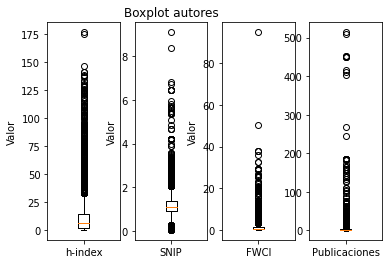

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,4)
ax[0].boxplot(df3['h-index'])
ax[0].set_xticklabels(['h-index'])
ax[0].set_ylabel('Valor')
ax[1].boxplot(df3['SNIP (publication year)'])
ax[1].set_xticklabels(['SNIP'])
ax[1].set_ylabel('Valor')
ax[2].boxplot(df3['Field-Weighted Citation Impact'])
ax[2].set_xticklabels(['FWCI'])
ax[3].boxplot(df3['Frecuencia'])
ax[3].set_xticklabels(['Publicaciones'])
ax[2].set_ylabel('Valor')
ax[1].set_title('Boxplot autores')
plt.show()

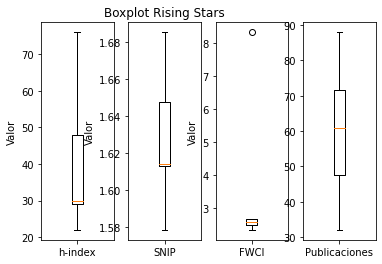

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,4)
ax[0].boxplot(rising_stars['h-index'])
ax[0].set_xticklabels(['h-index'])
ax[0].set_ylabel('Valor')
ax[1].boxplot(rising_stars['SNIP (publication year)'])
ax[1].set_xticklabels(['SNIP'])
ax[1].set_ylabel('Valor')
ax[2].boxplot(rising_stars['Field-Weighted Citation Impact'])
ax[2].set_xticklabels(['FWCI'])
ax[3].boxplot(rising_stars['Frecuencia'])
ax[3].set_xticklabels(['Publicaciones'])
ax[2].set_ylabel('Valor')
ax[1].set_title('Boxplot Rising Stars')
plt.show()